In [2]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
import palettable as pal

Populating the interactive namespace from numpy and matplotlib


In [18]:
evaluation_frame = pd.read_csv("../assembly_evaluation_data/merged_annotation_stats.csv",index_col='SampleName')
reads_table = pd.read_csv("../assembly_evaluation_data/MMETSP_plotting_data.csv",index_col='SampleName')
reads_frame2 = reads_table[['Phylum','Input.Reads','Unique_kmers_assembly','mean_orf_percent.x','score.x','Complete_eukaryotic_BUSCO_perc']].dropna()

In [21]:
groups_of_interest=reads_frame2.groupby('Phylum').count().sort_values(by='Input.Reads', 
                                                                      ascending=False).iloc[0:8].drop(['Unknown']).index
groups_of_interest

Index(['Bacillariophyta', 'Dinophyta', 'Ochrophyta', 'Haptophyta',
       'Chlorophyta', 'Ciliophora', 'Cryptophyta'],
      dtype='object', name='Phylum')

In [26]:
groups_of_interest_nums = reads_frame2.groupby('Phylum').count().sort_values(by='Input.Reads', 
                                                                      ascending=False).iloc[0:8]
groups_of_interest_nums

,Input.Reads,Unique_kmers_assembly,mean_orf_percent.x,score.x,Complete_eukaryotic_BUSCO_perc
Phylum,,,,,
Bacillariophyta,173,173,173,173,173
Dinophyta,111,111,111,111,111
Ochrophyta,73,73,73,73,73
Haptophyta,61,61,61,61,61
Unknown,60,60,60,60,60
Chlorophyta,60,60,60,60,60
Ciliophora,25,25,25,25,25
Cryptophyta,22,22,22,22,22


In [19]:
reads_frame2.head()

,Phylum,Input.Reads,Unique_kmers_assembly,mean_orf_percent.x,score.x,Complete_eukaryotic_BUSCO_perc
SampleName,,,,,,
MMETSP0004,Ochrophyta,24803955.0,19837761,81.26381,0.38093,0.693069
MMETSP0005,Ochrophyta,28100060.0,20350054,80.15649,0.38214,0.673267
MMETSP0006,Haptophyta,21466210.0,25286098,80.79508,0.38143,0.557756
MMETSP0007,Haptophyta,20174360.0,12496793,71.01950,0.27164,0.303630
MMETSP0009,Bacillariophyta,15820915.0,30074483,80.37076,0.25534,0.465347


In [4]:
false_crbb = pd.read_csv("../assembly_evaluation_data/false_crbb.csv",index_col=0)

In [5]:
false_crbb.head()

,false_crbb_num_transcripts
MMETSP1347,812
MMETSP0603,5341
MMETSP0469,101484
MMETSP1075,57113
MMETSP1369,46402


In [6]:
crbb_df = pd.merge(data_table[['total_annotated_w_false_crbb']],false_crbb[['false_crbb_num_transcripts']],
                   how='outer',left_index=True,right_index=True).dropna()

In [7]:
crbb_df.head()

,total_annotated_w_false_crbb,false_crbb_num_transcripts
MMETSP0004,2352,12265.0
MMETSP0005,1833,9950.0
MMETSP0006,4837,22569.0
MMETSP0007,1448,5599.0
MMETSP0010,4022,21159.0


In [8]:
data_table.columns

Index(['Unnamed: 0', 'n_seqs', 'total_annotation_names',
       'total_annotated_contigs', 'unique_annotations', 'total_false_crbb',
       'total_OrthoDB', 'unique_OrthoDB', 'false_crbb_OrthoDB', 'total_Pfam',
       'unique_Pfam', 'false_crbb_Pfam', 'total_Rfam', 'unique_Rfam',
       'false_crbb_Rfam', 'total_annotated_w_false_crbb'],
      dtype='object')

(0, 30000)

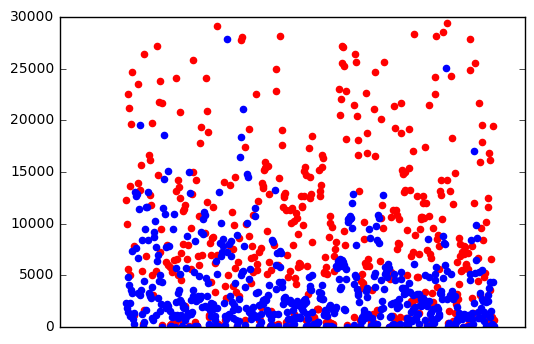

In [11]:
fig, ax = plt.subplots(1)
X = range(len(crbb_df))
Y1 = crbb_df[['false_crbb_num_transcripts']]
Y2 = crbb_df[['total_annotated_w_false_crbb']]

ax.scatter(X,Y1,color="red")
ax.scatter(X,Y2,color="blue")
ax.set_xticks([])
ax.set_ylim([0,30000])

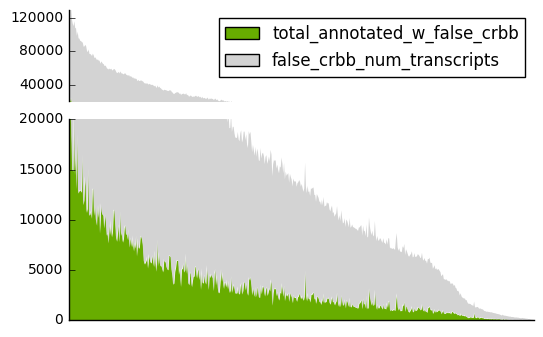

In [12]:
import matplotlib.gridspec as gridspec
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

gs = gridspec.GridSpec(3, 3)
ax = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1:,:])

crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False).plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax)
# alternative legend labels:
# transcripts absent from NCGR
# anntoated absent transcripts
crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False).plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax2, legend=False)
ax.set_ylim([20000,130000])
ax2.set_ylim([0,20000])
simpleaxis(ax)
simpleaxis(ax2)
ax.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax.set_xticks([])
ax.set_yticks(np.arange(40000,120001,40000))
savefig('false_crbb.png')

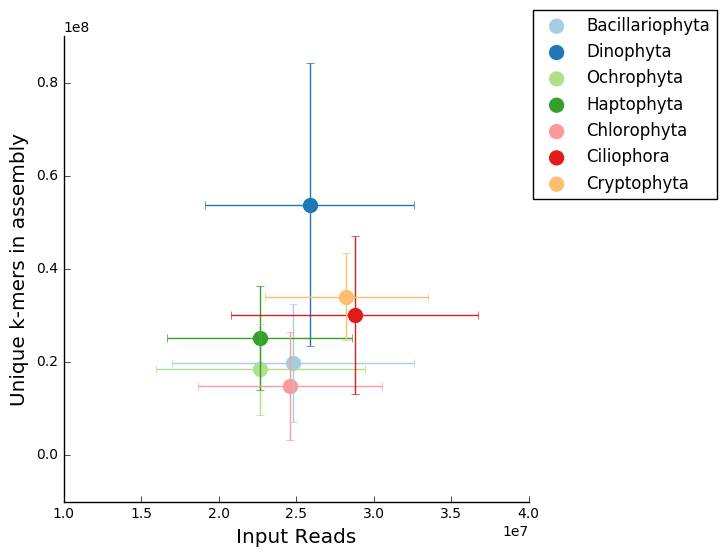

In [24]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()



import palettable as pal

reads_mean=reads_frame2.groupby('Phylum').mean().loc[groups_of_interest]
reads_std=reads_frame2.groupby('Phylum').std().loc[groups_of_interest]

X='Input.Reads'
Y='Unique_kmers_assembly'

t=range(len(reads_mean.index))
fig,ax=plt.subplots(1)
fig.set_size_inches(6,6)
cmap=pal.colorbrewer.qualitative.Paired_9.hex_colors

for n,i in enumerate(groups_of_interest):
    ax.scatter(reads_mean.loc[i,X], reads_mean.loc[i,Y], color=cmap[n], label=i, s=100)
    ax.errorbar(reads_mean.loc[i,X], reads_mean.loc[i,Y], xerr=reads_std.loc[i,X], yerr=reads_std.loc[i,Y], color=cmap[n])

ax.set_xlabel('Input Reads', fontsize='x-large')
ax.set_ylabel('Unique k-mers in assembly', fontsize='x-large')
ax.legend(ncol=1, loc=[1.01,.65], scatterpoints=1)

simpleaxis(ax)

In [ ]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()



import palettable as pal

reads_mean=reads_frame2.groupby('Phylum').mean().loc[groups_of_interest]
reads_std=reads_frame2.groupby('Phylum').std().loc[groups_of_interest]

X='Input.Reads'
Y='Unique_kmers_assembly'

t=range(len(reads_mean.index))
fig,ax=plt.subplots(1)
fig.set_size_inches(6,6)
cmap=pal.colorbrewer.qualitative.Paired_9.hex_colors

for n,i in enumerate(groups_of_interest):
    ax.scatter(reads_mean.loc[i,X], reads_mean.loc[i,Y], color=cmap[n], label=i, s=100)
    ax.errorbar(reads_mean.loc[i,X], reads_mean.loc[i,Y], xerr=reads_std.loc[i,X], yerr=reads_std.loc[i,Y], color=cmap[n])

ax.set_xlabel('Input Reads', fontsize='x-large')
ax.set_ylabel('Unique k-mers in assembly', fontsize='x-large')
ax.legend(ncol=1, loc=[1.01,.65], scatterpoints=1)

simpleaxis(ax)